# Instagram Agent Demo

This notebook demonstrates how to use the `ig_agent` library to generate Instagram carousel posts with AI.

## 1. Setup and Installation

First, ensure you have all the necessary dependencies installed:

In [1]:
# Install dependencies if needed
!pip install -q langchain_xai cairosvg
!pip install -q -e .


[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: pip install --upgrade pip


## 2. Basic Usage - Direct API

The simplest way to use the Instagram Agent is through its direct API, which provides methods for each step of the content generation and posting process.

In [2]:
import os
import logging
from pathlib import Path
from IPython.display import Image, display, HTML
from langchain_xai import ChatXAI
from ig_agent import InstagramAgent

# Set up logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s',
    handlers=[logging.StreamHandler()]
)
logger = logging.getLogger("ig_agent_demo")

In [3]:
# Create base output directory 
# Now outputs will be stored in datetime subdirectories
output_dir = Path("output")
output_dir.mkdir(exist_ok=True)

# Initialize language model
# You can use any LangChain compatible LLM here
llm = ChatXAI(model="grok-3-mini-beta")

# Initialize the Instagram agent
# Output will automatically be stored in a datetime-based directory structure
# For example: output/2025-04-20/20250420_154900/
agent = InstagramAgent(
    llm=llm,
    output_dir=output_dir,
    # Optional: provide credentials for notification and posting
    email_user=os.environ.get("EMAIL_USER"),
    email_password=os.environ.get("EMAIL_PASSWORD"),
    instagram_username=os.environ.get("INSTAGRAM_USERNAME"),
    instagram_password=os.environ.get("INSTAGRAM_PASSWORD")
)

### 2.1 Generate Content

First, we generate the content for our Instagram carousel post based on a request:

In [4]:
from datetime import datetime
today = datetime.now().strftime('%Y-%b-%d')
today

'2025-Apr-27'

In [5]:
import pandas as pd
df = pd.read_json('data/content_history.json')
latest_10rows_df =df.iloc[-10:]
latest_10rows_df.to_dict()

{'date': {11: Timestamp('2025-04-23 13:10:19.583376'),
  12: Timestamp('2025-04-23 13:21:04.506031'),
  13: Timestamp('2025-04-23 13:21:46.053301'),
  14: Timestamp('2025-04-23 13:26:41.557815'),
  15: Timestamp('2025-04-23 13:37:50.518470'),
  16: Timestamp('2025-04-23 13:42:42.135440'),
  17: Timestamp('2025-04-24 11:46:34.359186'),
  18: Timestamp('2025-04-24 12:17:12.846487'),
  19: Timestamp('2025-04-25 13:40:44.213580'),
  20: Timestamp('2025-04-27 19:39:27.693493')},
 'signature': {11: '0a8f73a513cb6d33d993b57493ef4842',
  12: '9f2522fe9cae5d7d8b52627c6fe8eb7b',
  13: '7754adb143472cc3575c38e7cb4185ac',
  14: '0cffbebe59d10941d845a45b740b220a',
  15: '0f68a8dc0388f966e911500baab17cba',
  16: '6ed94190af586fcf4b0e485b769fc1e6',
  17: '5f063a43164ecb728747831118812174',
  18: 'd0264a1b34dde96df4808e72e053e8b9',
  19: 'd1d22d33106c4a2a973d53735cf3cb37',
  20: '8e8c0418def49eea22d684c38ffa9b9a'},
 'cover_heading': {11: 'LLM Mesh 革命 高效AI應用',
  12: 'AI革命來臨 大語言模型新進展',
  13: 'LLM Mesh揭秘

In [6]:
# Generate content
request = f"""
今日係 {today}, 星期{datetime.now().weekday()}.
最近10近貼文：{
    latest_10rows_df.to_dict()
}
不要重覆內容。
選取以下一內容製作今日的貼文，你可選擇是否再上網搜尋資料。不要用中國字，用香港字、繁體中文撰寫。
| **內容類型**         | **具體題材**                                                                 | **預期效果**                                                                 |
|----------------------|------------------------------------------------------------------------------|------------------------------------------------------------------------------|
| **教育性貼文**       | - 解釋AI基本概念（如機器學習、深度學習、自然語言處理）<br>- 數據科學工具介紹（如Python、R、Tableau）<br>- 簡單算法原理（e.g., 線性回歸、決策樹） | 吸引初學者，提供入門知識，增加帳號專業性。                                   |
| **實用技巧分享**     | - Python/R程式碼片段（e.g., 數據清理、視覺化）<br>- Jupyter Notebook使用技巧<br>- 免費學習資源推薦（課程、書籍、YouTube頻道） | 提供實用價值，吸引技術愛好者，提升互動率。                                   |
| **案例分析**         | - AI應用案例（e.g., 醫療影像診斷、推薦系統）<br>- 數據科學項目實例（e.g., 銷售預測）<br>- 失敗案例分析（e.g., 模型過擬合問題） | 展示AI/數據科學的實際應用，激發靈感，吸引專業人士。                           |
| **趨勢與新聞**       | - 最新AI技術進展（e.g., 大語言模型、生成式AI）<br>- 數據科學行業趨勢（e.g., 自動化數據分析）<br>- 倫理問題討論（e.g., AI偏見） | 保持內容新鮮，吸引關注行業動態的受眾。                                       |
| **互動內容**         | - 問答貼文（e.g., “你用哪個數據科學工具？”）<br>- 投票（e.g., “Python vs R，哪個更好？”）<br>- 挑戰（e.g., 7天學會Pandas） | 提高粉絲參與度，建立社群感。                                               |
| **幕後花絮**         | - 數據科學家/工程師一天的工作分享<br>- 項目開發過程（e.g., 從數據收集到模型部署）<br>- 學習路徑分享（e.g., 自學數據科學的經驗） | 增加人性化元素，拉近與受眾的距離。                                           |
| **迷因與輕鬆內容**   | - AI/數據科學相關迷因（e.g., “當模型訓練了10小時還是沒收斂”）<br>- 程式員幽默（e.g., debug的痛苦）<br>- 數據科學家日常趣事 | 增加趣味性，吸引年輕受眾，提高轉發率。                                       |
| **面試內容**   | - AI/數據科學相關職位的面試內容，以FAANG公司為主。 | 增加趣味性，吸引年輕受眾，提高轉發率。                                       |

"""
content_json = agent.generate_content(request)


2025-04-27 20:06:02,088 - ig_agent - INFO - Generating content for request: 
今日係 2025-Apr-27, 星期6.
最近10近貼文：{'date': {11: Timestamp('2025-04-23 13:10:19.583376'), 12: Timestamp('2025-04-23 13:21:04.506031'), 13: Timestamp('2025-04-23 13:21:46.053301'), 14: Timestamp('2025-04-23 13:26:41.557815'), 15: Timestamp('2025-04-23 13:37:50.518470'), 16: Timestamp('2025-04-23 13:42:42.135440'), 17: Timestamp('2025-04-24 11:46:34.359186'), 18: Timestamp('2025-04-24 12:17:12.846487'), 19: Timestamp('2025-04-25 13:40:44.213580'), 20: Timestamp('2025-04-27 19:39:27.693493')}, 'signature': {11: '0a8f73a513cb6d33d993b57493ef4842', 12: '9f2522fe9cae5d7d8b52627c6fe8eb7b', 13: '7754adb143472cc3575c38e7cb4185ac', 14: '0cffbebe59d10941d845a45b740b220a', 15: '0f68a8dc0388f966e911500baab17cba', 16: '6ed94190af586fcf4b0e485b769fc1e6', 17: '5f063a43164ecb728747831118812174', 18: 'd0264a1b34dde96df4808e72e053e8b9', 19: 'd1d22d33106c4a2a973d53735cf3cb37', 20: '8e8c0418def49eea22d684c38ffa9b9a'}, 'cover_heading': 

In [7]:
# Display the generated content structure
print(f"Cover: {content_json['cover']['heading_line1']} {content_json['cover']['heading_line2']}")
print(f"Hashtag: #{content_json['cover']['hashtag']}")
print(f"Number of content pages: {len(content_json['content_pages'])}")
print("\nContent Pages:")
for i, page in enumerate(content_json['content_pages']):
    print(f"  Page {i+1}: {page['title']} - {page['main_point']}")

print("\nCaption Preview:")
print(content_json['caption'][:200] + "...")

Cover: AI醫療革命 最新突破大揭秘
Hashtag: #AIHealthcareTrends
Number of content pages: 6

Content Pages:
  Page 1: AI在醫療的最新突破 - 2025年，AI模型如新版影像分析工具，能檢測癌症早於傳統方法，提升準確率達95%。這改變了診斷流程，讓醫生更快行動。
  Page 2: 實際應用例子 - 如Google的AI系統，用於X光影像識別肺部疾病，減少誤診率。這些工具已在醫院實用化，幫助處理海量數據。
  Page 3: 優點與挑戰 - 優點：加快診斷、降低成本。但挑戰包括數據隱私和AI偏見，需要嚴格監管以確保公平性。
  Page 4: 如何開始使用 - 初學者可透過免費工具如Hugging Face試用AI模型。加入線上課程，學習整合AI於醫療項目中，提升你的專業技能。
  Page 5: 未來展望 - 預計2025年底，AI將更廣泛應用於遠距醫療，帶來更個人化的照護。及早學習，抓住這波趨勢機會！
  Page 6: 實用小貼士 - 關注AI倫理指南，確保應用時注重患者隱私。這樣能讓你的AI項目更可靠且具影響力。

Caption Preview:
你知道AI正如何改變醫療世界嗎？🤖 從診斷到預測，這篇貼文將帶你探索2025年AI在醫療的最新應用，讓你快速了解這些創新如何提升效率和準確性！💡 無論你是AI愛好者還是醫療從業者，這裡有實用見解，幫助你應用在工作中。別錯過，從第一頁開始滑動，獲得獨家趨勢分析吧！😎 #AIHealthcare #DataScienceTrends #AIMedicalInnovation #TechBreakthr...


### 2.2 Generate Images

Next, we generate the images for our carousel post based on the content:

In [8]:
import os
os.environ['DYLD_LIBRARY_PATH'] = '/opt/homebrew/lib:' + os.environ.get('DYLD_LIBRARY_PATH', '')

In [9]:
# Generate images
images = agent.generate_images(content_json)

# Display summary
print(f"Generated {len(images)} images:")
for img in images:
    print(f"  {img['type'].capitalize()}{' ' + str(img['page_number']) if 'page_number' in img else ''}: {img['file_name']}")

2025-04-27 20:06:39,575 - ig_agent - INFO - Generating images from content
2025-04-27 20:06:39,672 - ig_agent.template_processor - WARNING - PyCairo is not available, falling back to other methods
2025-04-27 20:06:39,672 - ig_agent.template_processor - INFO - CairoSVG version: 2.7.1
2025-04-27 20:06:39,673 - ig_agent.template_processor - INFO - Attempting SVG conversion with rsvg-convert for cover...
2025-04-27 20:06:39,918 - ig_agent.template_processor - INFO - Successfully converted SVG to PNG using rsvg-convert
2025-04-27 20:06:39,919 - ig_agent.template_processor - INFO - Generated cover image: output/2025-04-27/20250427_200601/cover.png
2025-04-27 20:06:39,921 - ig_agent.template_processor - INFO - Attempting SVG conversion with rsvg-convert for content page 1...
2025-04-27 20:06:40,055 - ig_agent.template_processor - INFO - Successfully converted SVG to PNG using rsvg-convert
2025-04-27 20:06:40,055 - ig_agent.template_processor - INFO - Generated content image 1: output/2025-04-

Generated 7 images:
  Cover: cover.png
  Content 1: content_01.png
  Content 2: content_02.png
  Content 3: content_03.png
  Content 4: content_04.png
  Content 5: content_05.png
  Content 6: content_06.png


### 2.3 Display Generated Images

Now, let's visualize the images that were generated:

In [10]:
# # Display cover image
# cover_image = next(img for img in images if img['type'] == 'cover')
# print("Cover Image:")
# display(Image(cover_image['path']))

In [11]:
# # Display cover image
# cover_image = next(img for img in images if img['type'] != 'cover')
# print("Cover Image:")
# display(Image(cover_image['path']))

### 2.4 Send Notification (Optional)

If you've provided email credentials, you can send a notification with the generated content:

In [12]:
# # Send notification if credentials are available
# if os.environ.get("EMAIL_USER") and os.environ.get("EMAIL_PASSWORD"):
#     recipient_email = "your.email@example.com"  # Replace with your email
#     notification_status = agent.send_notification(recipient_email)
#     print(f"Notification sent: {notification_status['sent']}")
#     if notification_status['sent']:
#         print(f"Email sent to: {notification_status['recipient']}")
#         print(f"Subject: {notification_status['subject']}")
# else:
#     print("Email credentials not available, skipping notification")

Email credentials not available, skipping notification


### 2.5 Post to Instagram (Optional)

If you've provided Instagram credentials, you can post the content to Instagram:

In [13]:
# Post to Instagram if credentials are available
if os.environ.get("INSTAGRAM_USERNAME") and os.environ.get("INSTAGRAM_PASSWORD"):
    try:
        # Try with explicit error handling
        instagram_status = agent.post_to_instagram()
        print(f"Posted to Instagram: {instagram_status['posted']}")
        
        if instagram_status['posted']:
            print(f"Post URL: {instagram_status.get('url', 'N/A')}")
            print(f"Post type: {instagram_status.get('type', 'N/A')}")
        else:
            print(f"Posting failed: {instagram_status.get('error', 'Unknown error')}")
            print(f"Suggestion: {instagram_status.get('suggestion', 'Check logs for details')}")
            
            # If simulated, show what would have been posted
            if instagram_status.get('simulated', False):
                print("\nSimulated posting:")
                print(f"Would have posted {instagram_status.get('num_images', 0)} images")
                print(f"With caption length: {len(instagram_status.get('caption', ''))}")
    except Exception as e:
        print(f"Exception during Instagram posting: {str(e)}")
        print("Check that your Instagram credentials are correct and that the instagrapi package is installed")
        print("Install with: pip install instagrapi")
else:
    print("Instagram credentials not available, skipping post")
    print("To post to Instagram, set the INSTAGRAM_USERNAME and INSTAGRAM_PASSWORD environment variables")

2025-04-27 20:06:40,791 - ig_agent - INFO - Posting to Instagram
2025-04-27 20:06:40,807 - ig_agent.instagram_poster - INFO - Converted output/2025-04-27/20250427_200601/cover.png to output/2025-04-27/20250427_200601/cover.jpg
2025-04-27 20:06:40,814 - ig_agent.instagram_poster - INFO - Converted output/2025-04-27/20250427_200601/content_01.png to output/2025-04-27/20250427_200601/content_01.jpg
2025-04-27 20:06:40,820 - ig_agent.instagram_poster - INFO - Converted output/2025-04-27/20250427_200601/content_02.png to output/2025-04-27/20250427_200601/content_02.jpg
2025-04-27 20:06:40,826 - ig_agent.instagram_poster - INFO - Converted output/2025-04-27/20250427_200601/content_03.png to output/2025-04-27/20250427_200601/content_03.jpg
2025-04-27 20:06:40,832 - ig_agent.instagram_poster - INFO - Converted output/2025-04-27/20250427_200601/content_04.png to output/2025-04-27/20250427_200601/content_04.jpg
2025-04-27 20:06:40,838 - ig_agent.instagram_poster - INFO - Converted output/2025-04

Posted to Instagram: True
Post URL: https://www.instagram.com/p/DI8jHZFJXIf/
Post type: carousel


## 3. Using the LangGraph Pipeline

The Instagram Agent can also be used with a LangGraph pipeline, which provides a graph-based workflow with streaming intermediate results.

In [14]:
from ig_agent.pipeline import create_pipeline

# Create the pipeline
pipeline = create_pipeline(
    llm=llm,
    output_dir=output_dir,
    email_user=os.environ.get("EMAIL_USER"),
    email_password=os.environ.get("EMAIL_PASSWORD")
)

### 3.1 Visualize the Pipeline Graph

Let's visualize the pipeline graph to understand the workflow:

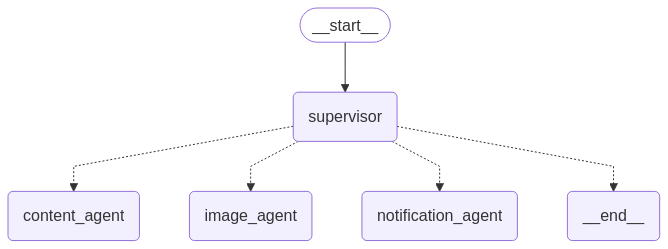

In [15]:
# Try to visualize the pipeline graph
try:
    # Visualize the graph (requires graphviz)
    display(Image(pipeline.get_graph().draw_mermaid_png()))
except Exception as e:
    print(f"Unable to visualize graph: {e}")